In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# 나무 구조 시각화
from sklearn.tree import plot_tree

In [3]:
# 데이터 불러오기

df_raw = pd.read_csv('data/body.csv')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [4]:
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop(columns = 'FAT', inplace = False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state=1234)

print('학습용 데이터의 X 크기: {}'.format(df_train_x.shape))
print('학습용 데이터의 Y 크기: {}'.format(df_train_y.shape))
print('평가용 데이터의 X 크기: {}'.format(df_test_x.shape))
print('평가용 데이터의 X 크기: {}'.format(df_test_y.shape))

학습용 데이터의 X 크기: (176, 13)
학습용 데이터의 Y 크기: (176,)
평가용 데이터의 X 크기: (76, 13)
평가용 데이터의 X 크기: (76,)


In [5]:
# 기본 모델 생성

gb_uncustomized = GradientBoostingRegressor(random_state = 1234)
gb_uncustomized.fit(df_train_x, df_train_y)

# 데이터 설명력

print('학습용 데이터의 모델 설명력: {:.3f}'.format(gb_uncustomized.score(df_train_x, df_train_y)))
print('평가용 데이터의 모델 설명력: {:.3f}'.format(gb_uncustomized.score(df_test_x, df_test_y)))  

학습용 데이터의 모델 설명력: 0.981
평가용 데이터의 모델 설명력: 0.581


In [6]:
# 현재 생성된 트리 모델의 옵션 확인

gb_uncustomized

GradientBoostingRegressor(random_state=1234)

###### 모델 파라미터 조정 Manual Search
- n_estimators : 트리 수 변경에 따른 모델 성능

In [7]:
# train 및 test 설명력 결과 저장
train_score = []
test_score = []

# n_estimators 트리 수 변경, 10 ~ 100
para_n_tree = [n_tree * 10 for n_tree in range(1, 11)] # para_n_tree = [10, 20 30, ... 100]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(n_estimators=v_n_estimators, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

In [8]:
# 모델 설명력 확인
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.712,0.512
1,20,0.850,0.589
2,30,0.897,0.600
3,40,0.921,0.599
4,50,0.942,0.587
5,60,0.954,0.586
6,70,0.963,0.587
7,80,0.970,0.581
8,90,0.976,0.582
9,100,0.981,0.581


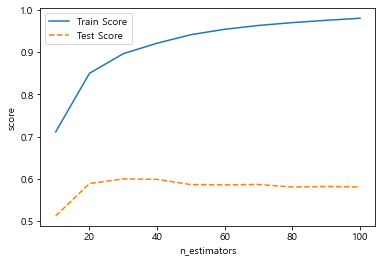

In [9]:
# 모델 설명력 그래프로 확인
plt.plot(para_n_tree, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_n_tree, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score')
plt.xlabel('n_estimators')
plt.legend()

###### 모델 파라미터 조정 : Manual Search
- min_samples_leaf

In [10]:
# train 및 test 설명력 결과 저장
train_score = []
test_score = []

# n_estimators 트리 수 변경, 10 ~ 100
para_leaf = [n_leaf for n_leaf in range(1, 21)] # para_n_tree = [1, 2, 3, 4, ..., 20]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(min_samples_leaf= v_min_samples_leaf, random_state=1234, n_estimators = 30)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [11]:
# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.897,0.600
1,2,0.899,0.599
2,3,0.896,0.594
3,4,0.893,0.586
4,5,0.890,0.604
5,6,0.888,0.596
6,7,0.884,0.590
7,8,0.874,0.610
8,9,0.879,0.598
9,10,0.873,0.587


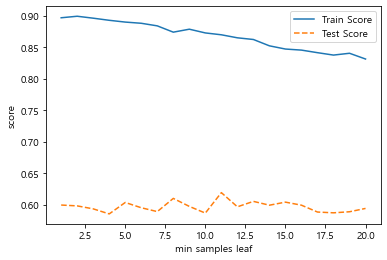

In [12]:
# 모델 설명력 그래프로 확인
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score')
plt.xlabel('min samples leaf')
plt.legend()

###### 모델 파라미터 조정 : Manual Search
- min_samples_split

In [16]:
# train 및 test 설명력 결과 저장
train_score = []
test_score = []


para_split = [n_split * 2 for n_split in range(2, 21)] # para_n_tree = [4, 6, 8, ..., 40]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(min_samples_leaf= 11, 
                                   random_state=1234, n_estimators = 30, min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split['MinSamplessplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

In [17]:
# 모델 설명력 확인
df_score_split.round(3)

,MinSamplessplit,TrainScore,TestScore
0,4,0.870,0.620
1,6,0.870,0.620
2,8,0.870,0.620
3,10,0.870,0.620
4,12,0.870,0.620
5,14,0.870,0.620
6,16,0.870,0.620
7,18,0.870,0.620
8,20,0.870,0.620
9,22,0.870,0.620


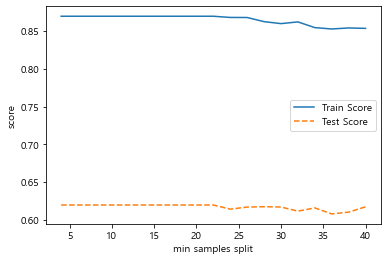

In [18]:
# 모델 설명력 그래프로 확인
plt.plot(para_split, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score')
plt.xlabel('min samples split')
plt.legend()

###### 모델 파라미터 조정 : Manual Search
- max_depth

In [19]:
# train 및 test 설명력 결과 저장
train_score = []
test_score = []


para_depth = [depth for depth in range(1, 11)] # para_n_tree = [1, 2, 3, 4, ..., 10]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(min_samples_leaf= 11, random_state=1234, n_estimators = 30, min_samples_split=22, max_depth= v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

In [20]:
# 모델 설명력 확인
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.703,0.592
1,2,0.800,0.600
2,3,0.870,0.620
3,4,0.900,0.629
4,5,0.913,0.613
5,6,0.917,0.614
6,7,0.920,0.613
7,8,0.920,0.615
8,9,0.921,0.609
9,10,0.922,0.616


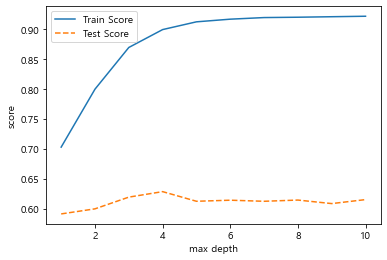

In [21]:
# 모델 설명력 그래프로 확인
plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score')
plt.xlabel('max depth')
plt.legend()

###### 모델 파라미터 조정 : Learning rate
- learning rate

In [27]:
# train 및 test 설명력 결과 저장
train_score = []
test_score = []


para_lr = [lr * 0.1 for lr in range(1, 10)] # para_n_tree = [0.1, 0.2, 0.3, ... 0.9]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(min_samples_leaf= 11, random_state=1234, n_estimators = 30, min_samples_split=22, max_depth= 4, learning_rate= v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_lr = pd.DataFrame()
df_score_lr['LearningRate'] = para_lr
df_score_lr['TrainScore'] = train_score
df_score_lr['TestScore'] = test_score

In [28]:
# 모델 설명력 확인
df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.900,0.629
1,0.2,0.940,0.588
2,0.3,0.966,0.566
3,0.4,0.981,0.539
4,0.5,0.984,0.533
5,0.6,0.990,0.527
6,0.7,0.993,0.478
7,0.8,0.994,0.437
8,0.9,0.997,0.464


###### RandomSearch 사용하여 최적의 파라미터 찾기

In [29]:
estimator = GradientBoostingRegressor(random_state = 1234)

# 구하고자 하는 파라미터와 범위
param_grid = {'n_estimators': para_n_tree, 'max_depth': para_depth,
             'min_samples_split': para_split, 'min_samples_leaf': para_leaf, 'learning_rate': para_lr, 'criterion': ['mse'], 'max_features': ['auto']}

# 설명력이 높은 최적 파라미터 찾기
random_gb = RandomizedSearchCV(estimator, param_grid, scoring = 'r2', n_jobs= -1)
random_gb.fit(df_train_x, df_train_y)

print('best estimator model: \n{}'.format(random_gb.best_estimator_))
print('\nbest parameter: \n{}'.format(random_gb.best_params_))
print('\nbest score: \n{}'.format(random_gb.best_score_.round(3)))

best estimator model: 
GradientBoostingRegressor(criterion='mse', max_depth=5, max_features='auto',
                          min_samples_leaf=17, min_samples_split=34,
                          n_estimators=60, random_state=1234)

best parameter: 
{'n_estimators': 60, 'min_samples_split': 34, 'min_samples_leaf': 17, 'max_features': 'auto', 'max_depth': 5, 'learning_rate': 0.1, 'criterion': 'mse'}

best score: 
0.659


# 실습 데이터로 해보기

In [61]:
df = pd.read_csv('data/hcr.csv')
df.head()

,No,temp,SLABweight,SLABwide,SLABthick,SLABlong,RolljoblinLT,SHEARinLT,TSmean
0,1,571,30.60,1570,250,9970,14.3,8.0,255
1,2,351,23.65,1020,250,11860,10.3,13.4,340
2,3,460,34.63,1500,250,11810,14.6,7.5,253
3,4,488,28.94,1570,250,9430,14.4,7.8,252
4,5,335,34.81,1500,250,11870,14.7,7.2,253


In [63]:
df.drop(columns = 'No', inplace = True)

In [65]:
df.head()

,temp,SLABweight,SLABwide,SLABthick,SLABlong,RolljoblinLT,SHEARinLT,TSmean
0,571,30.60,1570,250,9970,14.3,8.0,255
1,351,23.65,1020,250,11860,10.3,13.4,340
2,460,34.63,1500,250,11810,14.6,7.5,253
3,488,28.94,1570,250,9430,14.4,7.8,252
4,335,34.81,1500,250,11870,14.7,7.2,253


In [69]:
df_y = df['temp']
df_x = df.drop(columns = 'temp', inplace = False)

In [70]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.2, random_state=1234)

print('학습용 데이터의 X 크기: {}'.format(df_train_x.shape))
print('학습용 데이터의 Y 크기: {}'.format(df_train_y.shape))
print('평가용 데이터의 X 크기: {}'.format(df_test_x.shape))
print('평가용 데이터의 X 크기: {}'.format(df_test_y.shape))

학습용 데이터의 X 크기: (800, 7)
학습용 데이터의 Y 크기: (800,)
평가용 데이터의 X 크기: (200, 7)
평가용 데이터의 X 크기: (200,)


## Decision Tree

###### Manual Search
- max depth

In [42]:
from sklearn.tree import DecisionTreeRegressor

In [86]:
#학습용 및 평가용 설명력 결과 저장
train_score = []
test_score = []

# max depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 20)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))   
    
    # , min_samples_leaf = 8, min_samples_split=20, 

In [87]:
# 데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.518,0.557
1,2,0.673,0.672
2,3,0.716,0.667
3,4,0.744,0.684
4,5,0.771,0.692
5,6,0.805,0.698
6,7,0.838,0.690
7,8,0.868,0.678
8,9,0.896,0.610
9,10,0.921,0.569


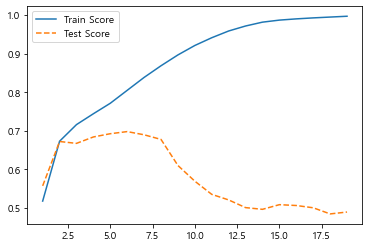

In [88]:
plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '--', label = 'Test Score')
plt.legend()

In [89]:
# depth 5으로 하자

dt = DecisionTreeRegressor(random_state=1234, max_depth=5)
dt.fit(df_train_x, df_train_y)

DecisionTreeRegressor(max_depth=5, random_state=1234)

In [90]:
dt.score(df_train_x, df_train_y)

0.7713473494640279

In [91]:
dt.score(df_test_x, df_test_y)

0.692470440129044

###### Manual Search
- min leaf

In [ ]:
#학습용 및 평가용 설명력 결과 저장
train_score = []
test_score = []

# min samples leaf : 잎사귀 최소 자료 수
para_leaf = [n_leaf for n_leaf in range(1, 20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))    

In [ ]:
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

df_score_leaf.round(3)

In [ ]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '--', label = 'Test Score')
plt.legend()

###### 그리드서치해보까

In [85]:
estimator = DecisionTreeRegressor()

# 구하고자 하는 파라미터와 범위
param_grid = {'criterion': ['mse', 'friedman_mse', 'mae'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': para_depth,
             'min_samples_split': para_split, 'min_samples_leaf': para_leaf}
# 설명력이 높은 최적 파라미터 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring = 'r2', n_jobs= -1) # r2 = 결정계수
grid_dt.fit(df_train_x, df_train_y)

print('best estimator model: \n{}'.format(grid_dt.best_estimator_))
print('\nbest parameter: \n{}'.format(grid_dt.best_params_))
print('\nbest score: \n{}'.format(grid_dt.best_score_.round(3)))

KeyboardInterrupt: 